<table>
    <tr>
        <td><a href="https://www.greedyai.com/"><img src="http://smallpay.greedyai.com/skin/images/logoNew.png">   </td>
        <td> <a href="http://aijiaoai.greedyai.com/home"><img src="http://smallpay.greedyai.com/%E5%8C%A0%E5%BF%83%E5%81%9A%E4%BA%8B.jpg">    </td>
    </tr>
</table>

<hr />

## 销售预测

In [9]:
# 导入库
import pandas as pd
import numpy as np
# 导入模型
from sklearn.linear_model import BayesianRidge

# 导入数据标准化函数
from sklearn.preprocessing import StandardScaler

# 导入MSE
from sklearn.metrics import mean_squared_error

# 导入画图
import matplotlib.pyplot as plt


In [10]:
# 数据准备
row_data = np.loadtxt("regression.txt")
X_raw,y = row_data[:, :-1],row_data[:, -1]

model_ss = StandardScaler()
X = model_ss.fit_transform(X_raw)

In [6]:
# 数据集的拆分
num = int(X.shape[0]*0.7)
# 训练集与测试集的拆分
X_train,X_test = X[:num,:], X[num:, :]
y_train,y_test = y[:num],y[num:]

In [15]:
# 注意这里，比较重要
model_names = ['BayesianRidge']
model_br = BayesianRidge()
# model_br2 = BayesianRidge()
# 实际上这里可以同时使用多个模型对象


# 这里可以放到列表中多个模型对象，也就是说我们可以同时用多个算法模型跑同一批数据
# 当结果运行出来以后，我们对每一个模型的效果进行观察，选择一个最好的模型
model_list = [model_br]
pre_y_list = [model.fit(X_train,y_train).predict(X_test) for model in model_list]


In [15]:
# 模型的效果评估
# 获取到总的样本量和总的特征数
n_samples, n_features = X.shape

# 注意这里的数据类型，同样是列表，也就是list，这里也可以使用多个指标进行评估
model_metrics_functions = [mean_squared_error]


# 回去评估指标
model_metrics_list = [[m(y_test,pre_y_list[i]) for m in model_metrics_functions for i in range(len(model_list))]]


#  建立回归指标的数据框
regresstion_sccore = pd.DataFrame(model_metrics_list, index=model_names,columns=['mse'])
print("所有样本数量：%d  特征数量： %d" % (n_samples, n_features))

print(regresstion_sccore)



所有样本数量：506  特征数量： 13
                      mse
BayesianRidge  121.319137


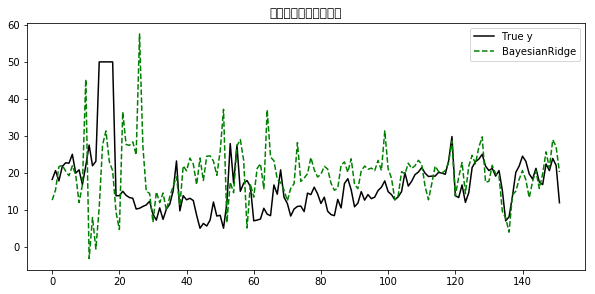

In [21]:
# 模型效果可视化
plt.figure(figsize=(10,10))

for i,pre_y in enumerate(pre_y_list): # 独处通过回归模型预测得到的索引以及其结果
    plt.subplot(len(pre_y_list)+1,1,i+1)
    plt.plot(np.arange(len(y_test)), y_test, color='k', label='True y')
    plt.plot(np.arange(len(y_test)), pre_y_list[i], 'g--', label=model_names[i])
    plt.title("真实值与预测结果对比")
    plt.legend(loc='upper right')


In [ ]:
## 拐点法确定最佳K值

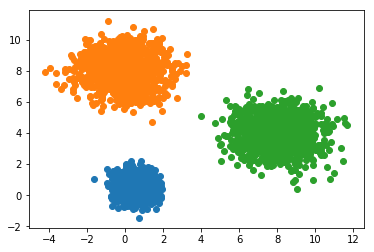

In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics

np.random.seed(1234)
mean1 = [0.5,0.5]
cov1 = [[0.3,0],[0,0.3]]

x1,y1 = np.random.multivariate_normal(mean1, cov1,1000).T

mean2= [0,8]
cov2 = [[1.5,0],[0,1]]

x2,y2 = np.random.multivariate_normal(mean2, cov2,1000).T

mean3 = [8,4]
cov3 = [[1.5,0],[0,1]]

x3,y3 = np.random.multivariate_normal(mean3, cov3,1000).T


#绘制散点图
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)

plt.show()

C:\Users\wangmengxian\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


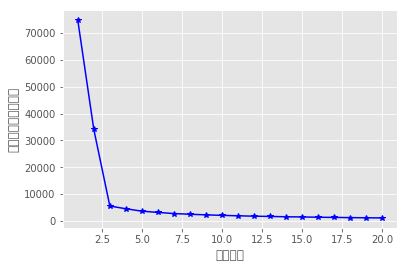

In [39]:

#将3组数据汇总到数据框中
X = pd.DataFrame(np.concatenate([np.array([x1,y1]),np.array([x2,y2]), np.array([x3,y3])], axis=1).T)
k_SSE(X,15)

In [ ]:
# pycharm